## Treinamento do modelo com cross-validation

### Passo 1: Importar Bibliotecas e Definir Parâmetros com Semente Aleatória

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam

# Configurar a semente aleatória
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)
random.seed(random_seed)

# Salvar a semente em um arquivo de texto
output_path = r"C:\Users\LAMII\Desktop\Classificação de emoção\ETL\Dataset\modelo"
os.makedirs(output_path, exist_ok=True)
with open(os.path.join(output_path, "random_seed.txt"), "w") as f:
    f.write(f"Semente aleatória: {random_seed}")

# Definindo parâmetros
img_height, img_width = 48, 48  # Tamanho das imagens
batch_size = 32
num_classes = 3  # Número de classes para classificação
epochs = 100      # Número de épocas de treinamento para cada fold
n_splits = 5     # Número de folds para validação cruzada


PermissionError: [WinError 5] Acesso negado: 'C:\\Users\\LAMII'

### Passo 2: Criar o Modelo CNN


In [ ]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [9]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,065,995 (4.07 MB)

 Trainable params: 355,331 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 710,664 (2.71 MB)

### Tentativa modelo 2

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([

    # Camada de entrada
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    # Primeira camada oculta
    tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    # Segunda camada oculta
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    # Terceira camada oculta
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    # Camada de Flatten
    tf.keras.layers.Flatten(),
    
    # Primeira camada densa
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    # Segunda camada densa
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    
    # Camada de saída (3 classes)
    tf.keras.layers.Dense(3, activation='softmax')  # Alterado para 3 classes
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 23, 23, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 23, 23, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 11, 11, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 11, 11, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 5, 5, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,839,491 (14.65 MB)

 Trainable params: 3,835,523 (14.63 MB)

 Non-trainable params: 3,968 (15.50 KB)

### Tentativa modelo 3

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def create_model():
    model = Sequential([
        # Camada de entrada
        Input(shape=(img_height, img_width, 1)),
        
        # Primeira camada convolucional
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        # Segunda camada convolucional
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        
        # Terceira camada convolucional
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        
        # Quarta camada convolucional
        Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        
        # Camada Flatten e densa
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        
        # Camada de saída
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.0005),  # Taxa de aprendizado menor para maior estabilidade
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Resumo do modelo
model = create_model()
model.summary()


NameError: name 'img_height' is not defined

### Passo 3: Preparar os Dados e Configurar o Cross-Validation
Usaremos ImageDataGenerator para carregar as imagens e aplicar algumas transformações básicas. Em seguida, realizaremos a validação cruzada com KFold.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Caminho para o dataset de treinamento
train_path = r"C:\Users\LAMII\Desktop\Classificação de emoção\ETL\Dataset\treinamento_2"

# Carregar e preparar os dados
data = []
labels = []

for class_name in os.listdir(train_path):
    class_folder = os.path.join(train_path, class_name)
    if os.path.isdir(class_folder):
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = load_img(img_path, color_mode="grayscale", target_size=(img_height, img_width))
            img_array = img_to_array(img) / 255.0  # Normalizar as imagens para [0, 1]
            data.append(img_array)
            labels.append(class_name)

# Converter para arrays numpy e codificar as labels
data = np.array(data, dtype="float32")
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels, num_classes=num_classes)


NameError: name 'os' is not defined

### Passo 4: Realizar o Cross-Validation e Salvar o Modelo com a Semente


In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint

kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)  # Usando a semente no KFold
fold_no = 1
history_per_fold = []

for train_index, val_index in kf.split(data):
    print(f'Treinando fold {fold_no} ...')
    model = create_model()
    
    # Criar os dados de treinamento e validação para o fold atual
    X_train, X_val = data[train_index], data[val_index]
    y_train, y_val = labels[train_index], labels[val_index]
    
    # Configuração para salvar o melhor modelo com a extensão .keras
    checkpoint = ModelCheckpoint(os.path.join(output_path, f'model_fold_{fold_no}.keras'), 
                             monitor='val_loss', save_best_only=True, verbose=1)
    
    # Treinamento do modelo
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[checkpoint]
    )
    
    # Salvar histórico para plotagem
    history_per_fold.append(history)
    fold_no += 1


NameError: name 'KFold' is not defined

### Passo 5: Plotar e Salvar as Curvas de Loss


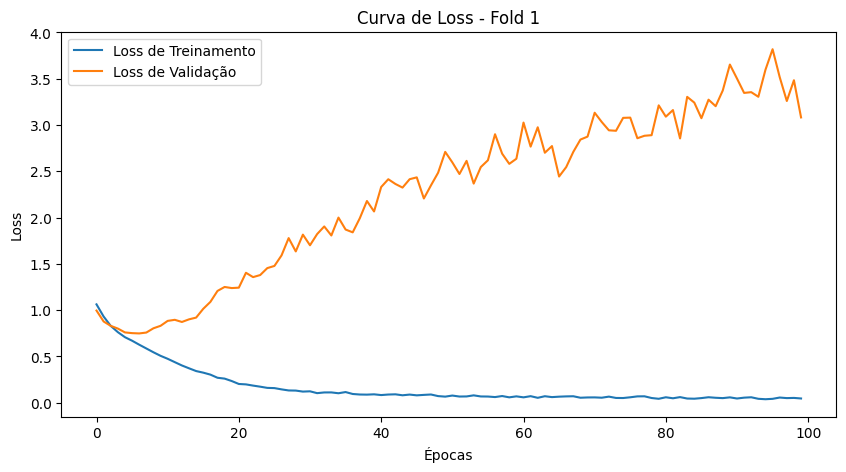

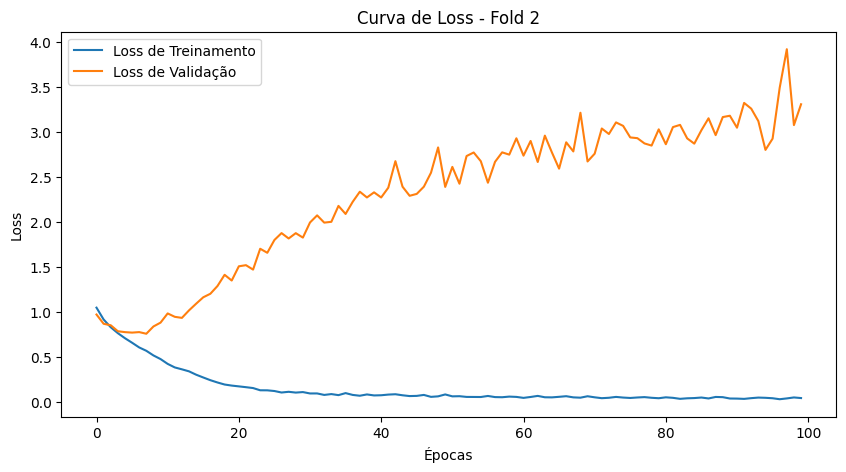

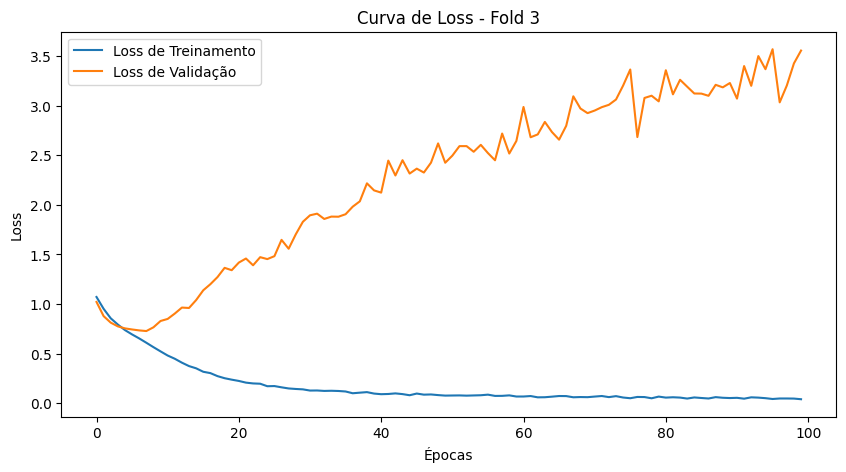

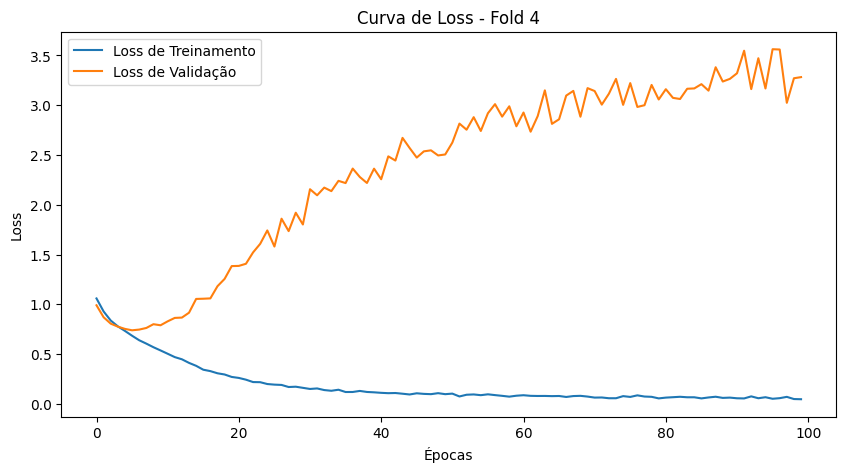

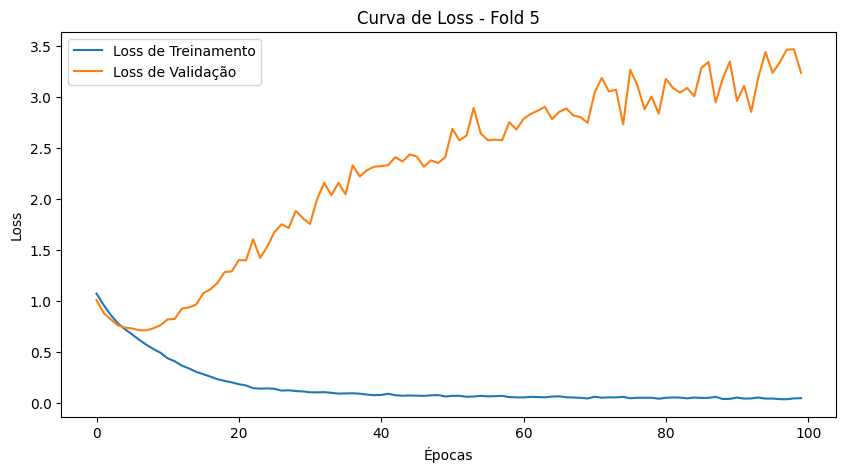

In [14]:
# Função para plotar e salvar as curvas de loss e acurácia
def plot_history(history, fold_no):
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Loss de Treinamento')
    plt.plot(history.history['val_loss'], label='Loss de Validação')
    plt.title(f'Curva de Loss - Fold {fold_no}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(os.path.join(output_path, f'loss_fold_{fold_no}.png'))
    plt.show()

# Plotar e salvar curvas de loss para cada fold
for i, history in enumerate(history_per_fold):
    plot_history(history, i + 1)


### Passo 6: Salvar o Modelo Final


In [15]:
import shutil
import os

# Listar todos os arquivos de modelo com o prefixo "model_fold_" na pasta de saída
model_files = [f for f in os.listdir(output_path) if f.startswith('model_fold_')]

# Procurar o menor val_loss registrado em cada fold e associar ao modelo correspondente
val_losses = []
for i, history in enumerate(history_per_fold):
    min_val_loss = min(history.history['val_loss'])
    val_losses.append((min_val_loss, model_files[i]))

# Encontrar o arquivo do modelo com o menor val_loss
best_model_file = min(val_losses, key=lambda x: x[0])[1]
best_model_path = os.path.join(output_path, best_model_file)

# Copiar o melhor modelo para "best_model.h5" na pasta de saída
shutil.copy(best_model_path, os.path.join(output_path, 'best_model.h5'))

print(f"Modelo final salvo como 'best_model.h5' na pasta {output_path}")



Modelo final salvo como 'best_model.h5' na pasta C:\Users\LAMII\Desktop\Classificação de emoção\ETL\Dataset\modelo
